In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Read the CSV and Perform Basic Data Cleaning

In [2]:
df = pd.read_csv("test_Data.csv")
# df = df.drop(columns=["rowid", "kepid", "kepoi_name", "kepler_name", "koi_pdisposition", "koi_score", "koi_tce_delivname"])
# Drop the null columns where all values are null
# df = df.dropna(axis='columns', how='all')
# Drop the null rows
# df = df.dropna()
df.head()

,abv,ibu,id,name,style,brewery_id,ounces
0,0.056,4,1350,Summer Solstice,Cream Ale,171,12.0
1,0.056,4,753,Summer Solstice Cerveza Crema (2009),Cream Ale,171,12.0
2,0.056,4,77,Summer Solstice (2011),Cream Ale,171,12.0
3,0.092,5,704,Devils Tramping Ground Tripel,Tripel,360,12.0
4,0.044,5,2520,Yo Soy Un Berliner,Berliner Weissbier,66,12.0


In [3]:
df = df.drop(columns=["name", "style", "brewery_id", "ounces"])
df.head()

,abv,ibu,id
0,0.056,4,1350
1,0.056,4,753
2,0.056,4,77
3,0.092,5,704
4,0.044,5,2520


# Create a Train Test Split

Use `koi_disposition` for the y values

In [4]:
X = df[["abv", "id"]]
y = df["ibu"].values.reshape(-1, 1)
print(X.shape, y.shape)


# X = foam[["foam", "beer"]]
# y = foam["time"].values.reshape(-1, 1)
# print(X.shape, y.shape)

(1405, 2) (1405, 1)


In [5]:
# Split the data using train_test_split
# YOUR CODE HERE
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [6]:
X_train.head()

,abv,id
10,0.034,1417
147,0.048,466
1206,0.078,395
282,0.039,2399
298,0.048,2583


In [7]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [8]:
model.fit(X_train, y_train)
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)

### END SOLUTION 

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.4458378032339943
Testing Score: 0.462086940846963


Text(0.5, 1.0, 'Residual Plot')

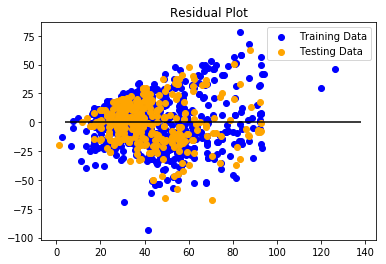

In [9]:
### BEGIN SOLUTION
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Residual Plot")
### END SOLUTION

# Pre-processing

Scale the data using the MinMaxScaler

In [10]:
# activity 3-5
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from tensorflow.keras.utils import to_categorical

X_scaler = MinMaxScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# Step 1: Label-encode data set
# label_encoder = LabelEncoder()
# label_encoder.fit(y_train)
# encoded_y_train = label_encoder.transform(y_train)
# encoded_y_test = label_encoder.transform(y_test)

# Step 2: Convert encoded labels to one-hot-encoding
# y_train_categorical = to_categorical(encoded_y_train)
# y_test_categorical = to_categorical(encoded_y_test)

C:\Users\Jeevs\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


# Train the Support Vector Machine

In [11]:
# activity 2-8
# Support vector machine linear classifier
from sklearn.svm import SVC 
model2 = SVC(kernel='linear')
model2.fit(X_train_scaled, y_train)
predictions = model2.predict(X_test)

C:\Users\Jeevs\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [12]:
print(f"Training Data Score: {model2.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {model2.score(X_test_scaled, y_test)}")

Training Data Score: 0.07597340930674264
Testing Data Score: 0.05113636363636364


# Hyperparameter Tuning

Use `GridSearchCV` to tune the `C` and `gamma` parameters

In [13]:
# activity 2-9 / 2-10
# Create the GridSearchCV model
# Create the GridSearch estimator along with a parameter object containing the values to adjust
# Try adjusting `C` with values of 1, 5, and 10. Adjust `gamma` using .0001, 0.001, and 0.01
# YOUR CODE HERE
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [1, 5, 10],
              'gamma': [0.0001, 0.001, 0.01]}
grid = GridSearchCV(model2, param_grid, verbose=3)

In [ ]:
# Train the model with GridSearch

# Fit the model using the grid search estimator. 
# This will take the SVC model and try each combination of parameters
# YOUR CODE HERE
grid.fit(X_train, y_train)

C:\Users\lonny\anacond\Anaconda3\envs\PandasData\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\lonny\anacond\Anaconda3\envs\PandasData\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\lonny\anacond\Anaconda3\envs\PandasData\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV] C=1, gamma=0.0001 ...............................................


In [ ]:
print(grid.best_params_)
print(grid.best_score_)

In [ ]:
# not on homework
# Make predictions with the hypertuned model
# YOUR CODE HERE
predictions = grid.predict(X_test)

In [ ]:
# Calculate classification report
# YOUR CODE HERE
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions,
                            target_names=["positive", "candidate", "negative"]))